In [ ]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/sample_data/marketing_campaign_data.csv")

In [ ]:
print(data.head())

   CustomerID  Age  Income      Education Marital_Status  Purchases  Response
0           1   25   30000  Undergraduate         Single          1         0
1           2   35   40000       Graduate        Married          2         1
2           3   45   50000   Postgraduate       Divorced          3         0
3           4   30   60000  Undergraduate         Single          4         1
4           5   50   70000       Graduate        Married          5         0


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      100 non-null    int64 
 1   Age             100 non-null    int64 
 2   Income          100 non-null    int64 
 3   Education       100 non-null    object
 4   Marital_Status  100 non-null    object
 5   Purchases       100 non-null    int64 
 6   Response        100 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 5.6+ KB
None


In [ ]:
print(data.describe())

       CustomerID         Age        Income   Purchases    Response
count  100.000000  100.000000    100.000000  100.000000  100.000000
mean    50.500000   37.000000  54000.000000    3.400000    0.500000
std     29.011492    8.761717  17523.433085    1.752343    0.502519
min      1.000000   25.000000  30000.000000    1.000000    0.000000
25%     25.750000   30.000000  40000.000000    2.000000    0.000000
50%     50.500000   35.000000  50000.000000    3.000000    0.500000
75%     75.250000   45.000000  70000.000000    5.000000    1.000000
max    100.000000   50.000000  80000.000000    6.000000    1.000000


In [ ]:
print(data.isnull().sum())

CustomerID        0
Age               0
Income            0
Education         0
Marital_Status    0
Purchases         0
Response          0
dtype: int64


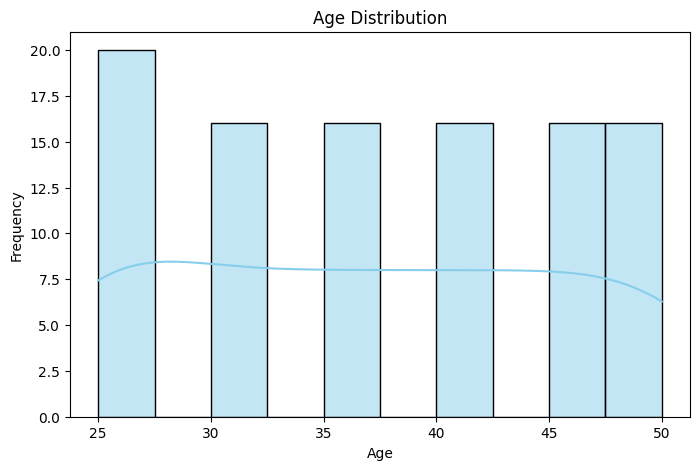

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], kde=True, bins=10, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

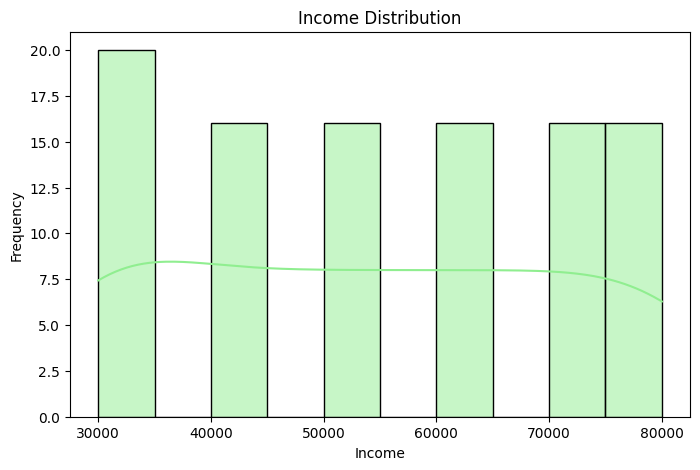

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Income'], kde=True, bins=10, color='lightgreen')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

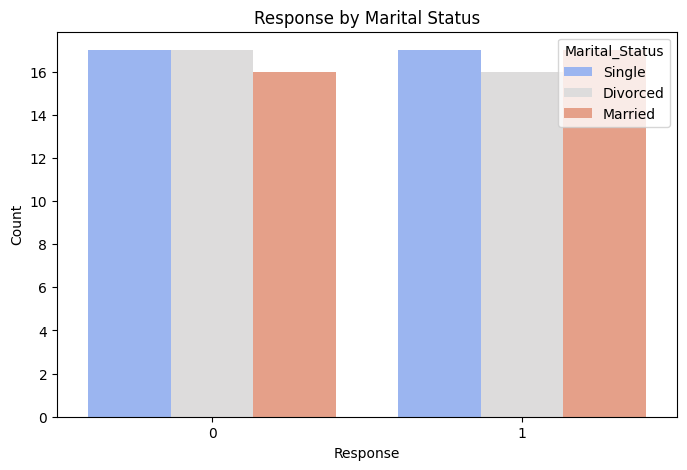

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Response', hue='Marital_Status', data=data, palette='coolwarm')
plt.title('Response by Marital Status')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

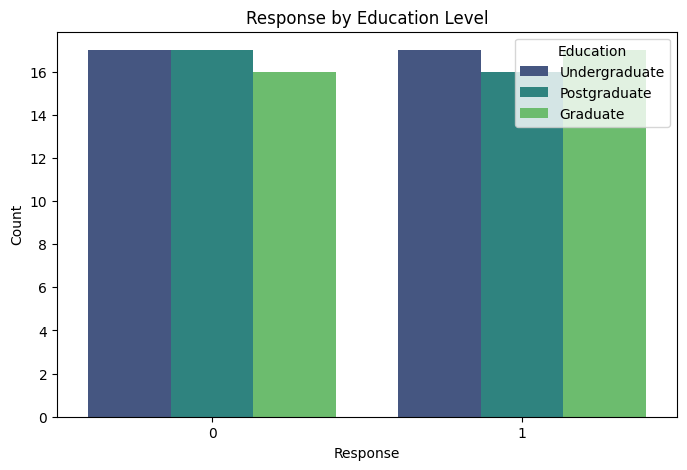

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Response', hue='Education', data=data, palette='viridis')
plt.title('Response by Education Level')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

In [ ]:
#وزيع العمر والدخل: يمكن أن يوضح الفئات الأكثر انتشارًا بين العملاء.

"العلاقة بين الاستجابة والمتغيرات الأخرى: ستظهر لنا ما إذا كانت الحالة الاجتماعية أو مستوى التعليم يؤثران على استجابة العملاء للحملة"


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
# Convert categorical data to numerical using LabelEncoder
le_education = LabelEncoder()
le_marital_status = LabelEncoder()

data['Education'] = le_education.fit_transform(data['Education'])
data['Marital_Status'] = le_marital_status.fit_transform(data['Marital_Status'])

In [ ]:
# Define features (X) and target (y)
X = data[['Age', 'Income', 'Education', 'Marital_Status', 'Purchases']]
y = data['Response']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Create and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred) * 100, "%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 100.0 %

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
svm_model = SVC(random_state=42)
knn_model = KNeighborsClassifier()
logreg_model = LogisticRegression(random_state=42)

In [ ]:
# Train models
svm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
logreg_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
# Make predictions
svm_pred = svm_model.predict(X_test)
knn_pred = knn_model.predict(X_test)
logreg_pred = logreg_model.predict(X_test)

In [ ]:
# Evaluate models
print("SVM Accuracy:", accuracy_score(y_test, svm_pred) * 100, "%")
print("\nSVM Classification Report:")
print(classification_report(y_test, svm_pred))

print("KNN Accuracy:", accuracy_score(y_test, knn_pred) * 100, "%")
print("\nKNN Classification Report:")
print(classification_report(y_test, knn_pred))

print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_pred) * 100, "%")
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, logreg_pred))

SVM Accuracy: 66.66666666666666 %

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.61      0.69        18
           1       0.56      0.75      0.64        12

    accuracy                           0.67        30
   macro avg       0.67      0.68      0.67        30
weighted avg       0.70      0.67      0.67        30

KNN Accuracy: 100.0 %

KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Logistic Regression Accuracy: 100.0 %

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00

In [ ]:
# Suppose we have new data (new_data) similar to the original data.
new_data = pd.DataFrame({
    'Age': [30],
    'Income': [55000],
    'Education': [1],  # Pre-coded
    'Marital_Status': [0],  # Pre-coded
    'Purchases': [5]
})

#Use the best model (e.g., KNN) to predict the response.
prediction = knn_model.predict(new_data)

print("Predicted Response:", prediction)


Predicted Response: [1]


In [ ]:
#After prediction using KNN or any other model
print("Predicted Response:", prediction)


Predicted Response: [1]


In [ ]:
print("Predicted Response: ", prediction)


Predicted Response:  [1]


In [ ]:
#View the full output of each model.
print("SVM Prediction:", svm_pred)
print("KNN Prediction:", knn_pred)
print("Logistic Regression Prediction:", logreg_pred)

# Check the actual result
print("True Values:", y_test)


SVM Prediction: [1 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0]
KNN Prediction: [1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0]
Logistic Regression Prediction: [1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0]
True Values: 83    1
53    1
70    0
45    1
44    0
39    1
22    0
80    0
10    0
0     0
18    0
30    0
73    1
33    1
90    0
4     0
76    0
77    1
12    0
31    1
55    1
88    0
26    0
42    0
69    1
15    1
40    0
96    0
9     1
72    0
Name: Response, dtype: int64


In [ ]:
# Model evaluation
print("SVM Accuracy:", accuracy_score(y_test, svm_pred) * 100, "%")
print("KNN Accuracy:", accuracy_score(y_test, knn_pred) * 100, "%")
print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_pred) * 100, "%")


SVM Accuracy: 66.66666666666666 %
KNN Accuracy: 100.0 %
Logistic Regression Accuracy: 100.0 %


In [ ]:
# View classification report
print("SVM Classification Report:")
print(classification_report(y_test, svm_pred))

print("KNN Classification Report:")
print(classification_report(y_test, knn_pred))

print("Logistic Regression Classification Report:")
print(classification_report(y_test, logreg_pred))


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.61      0.69        18
           1       0.56      0.75      0.64        12

    accuracy                           0.67        30
   macro avg       0.67      0.68      0.67        30
weighted avg       0.70      0.67      0.67        30

KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.

In [ ]:
from sklearn.metrics import confusion_matrix

#   Confusion Matrix
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, svm_pred))

print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, knn_pred))

print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, logreg_pred))


SVM Confusion Matrix:
[[11  7]
 [ 3  9]]
KNN Confusion Matrix:
[[18  0]
 [ 0 12]]
Logistic Regression Confusion Matrix:
[[18  0]
 [ 0 12]]
